In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2

In [2]:
data = []
labels = []
num_classes = 43


for i in range(num_classes):
    path = os.path.join("E:\kaggle projects\Traffic Sign\Train", str(i))
    images = os.listdir(path)

    for j in images:
        image = Image.open(path + '\\' + j)
        image = image.resize((64,64))
        image = np.asarray(image)
        data.append(image)
        labels.append(i)

In [3]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 64, 64, 3) (39209,)


In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(Y_train, 43)
Y_val = tf.keras.utils.to_categorical(Y_val, 43)

print('Training Set Shape: ' + str(X_train.shape)+ str(Y_train.shape))
print('Validation Set Shape: ' + str(X_val.shape) + str(Y_val.shape))


Training Set Shape: (31367, 64, 64, 3)(31367, 43)
Validation Set Shape: (7842, 64, 64, 3)(7842, 43)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(5,5), activation='relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(rate=0.40),
    tf.keras.layers.Dense(43, activation="softmax"),
])

In [6]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
hist = model.fit(X_train, Y_train, epochs = 10, batch_size = 64, validation_data=(X_val, Y_val))

Epoch 1/10
491/491 [==============================] - 593s 1s/step - loss: 1.9899 - accuracy: 0.6757 - val_loss: 0.1957 - val_accuracy: 0.9560
Epoch 2/10
491/491 [==============================] - 526s 1s/step - loss: 0.2512 - accuracy: 0.9313 - val_loss: 0.1051 - val_accuracy: 0.9750
Epoch 3/10
491/491 [==============================] - 531s 1s/step - loss: 0.1599 - accuracy: 0.9562 - val_loss: 0.0959 - val_accuracy: 0.9768
Epoch 4/10
491/491 [==============================] - 584s 1s/step - loss: 0.1274 - accuracy: 0.9645 - val_loss: 0.0573 - val_accuracy: 0.9866
Epoch 5/10
491/491 [==============================] - 606s 1s/step - loss: 0.1377 - accuracy: 0.9655 - val_loss: 0.0849 - val_accuracy: 0.9842
Epoch 6/10
491/491 [==============================] - 504s 1s/step - loss: 0.1220 - accuracy: 0.9703 - val_loss: 0.0569 - val_accuracy: 0.9876
Epoch 7/10
491/491 [==============================] - 512s 1s/step - loss: 0.0924 - accuracy: 0.9776 - val_loss: 0.0612 - val_accuracy: 0.9890

In [8]:
from sklearn.metrics import accuracy_score
test_df = pd.read_csv("E:\kaggle projects\Traffic Sign\Test.csv")
test_labels = test_df['ClassId'].to_numpy()
imgs = test_df['Path']

test_data = []
for img in imgs:
    i = Image.open("E:\kaggle projects\Traffic Sign" + '/' + img )
    i = i.resize((64,64))
    i = np.array(i)
    test_data.append(i)
test_data = np.array(test_data)
print(test_data.shape)
print(test_labels)

(12630, 64, 64, 3)
[16  1 38 ...  6  7 10]


In [9]:
import warnings 
warnings.filterwarnings("ignore")

pred = model.predict(test_data)
predicted_classes = np.argmax(pred, axis = 1)
print('Accuracy of test_data: ' , accuracy_score(test_labels, predicted_classes))

Accuracy of test_data:  0.9515439429928741


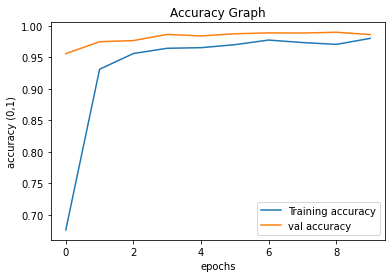

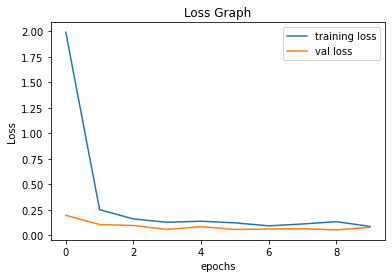

In [10]:
plt.figure(0)
plt.plot(hist.history['accuracy'], label="Training accuracy")
plt.plot(hist.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
model.save('German_traffic_signal.h5')